# K-means clustering algorithm

In [1]:
#Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
#Reading the dataset
data=pd.read_csv("C:/Users/sabbi/Downloads/Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
#To check the datatypes
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
#Checking the null values
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
#Checking for duplicated rows
data.duplicated().sum()

0

Text(0.5, 1.0, 'Gender (CountPlot)')

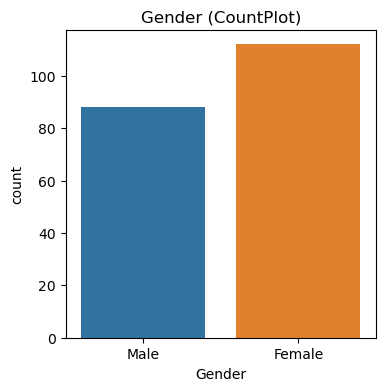

In [8]:
#Count Plot
plt.figure(figsize=(4,4))
sns.countplot(x='Gender',data=data)
plt.title('Gender (CountPlot)')

In [9]:
#Converting categorical values to numerical using OneHotEncoder
for col in ['Gender']:
    enc=OneHotEncoder()
    data[col]=data[col].astype('category')
    data[col]=data[col].cat.codes
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


Text(0.5, 1.0, 'Annual Income (Density Estimate plot)')

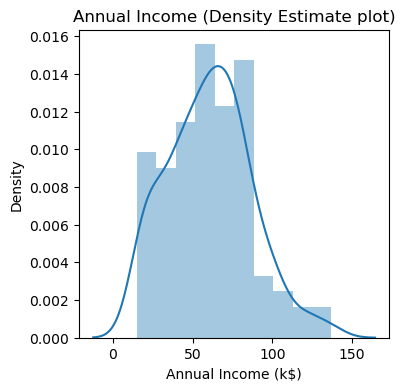

In [10]:
#Density estimate plot for annual income
plt.figure(figsize=(4,4))
sns.distplot(data['Annual Income (k$)'])
plt.title("Annual Income (Density Estimate plot)")

Text(0.5, 1.0, 'Age (Density Estimate plot)')

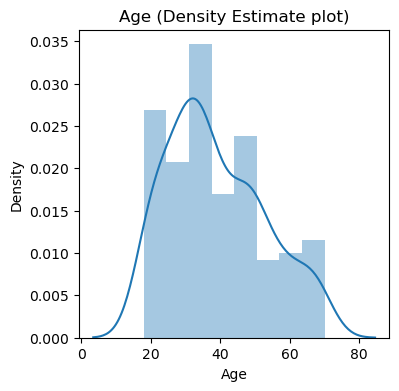

In [11]:
#Density estimate plot for annual income
plt.figure(figsize=(4,4))
sns.distplot(data['Age'])
plt.title("Age (Density Estimate plot)")

<Axes: >

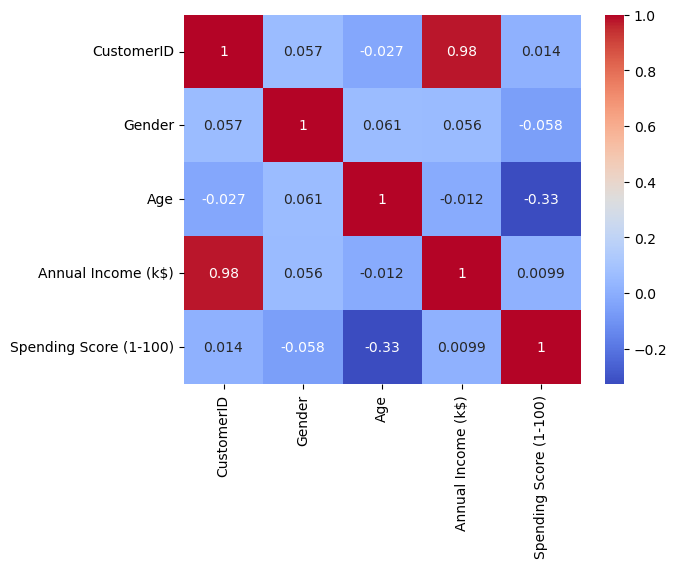

In [12]:
# Find the pearson correlations matrix
corr = data.corr(method = 'pearson')
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [13]:
# Cluster on 2 features
data1 = data[['Annual Income (k$)', 'Spending Score (1-100)']]
data1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


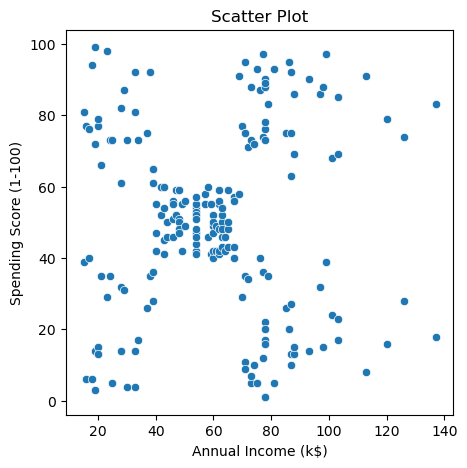

In [14]:
# scatter plot
plt.figure(figsize=(5,5))
sns.scatterplot(x=data1['Annual Income (k$)'], y=data1['Spending Score (1-100)'])
plt.title('Scatter Plot')
plt.show()

In [15]:
#Importing K means from sklearn
from sklearn.cluster import KMeans
errors = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data1)
    errors.append(kmeans.inertia_)

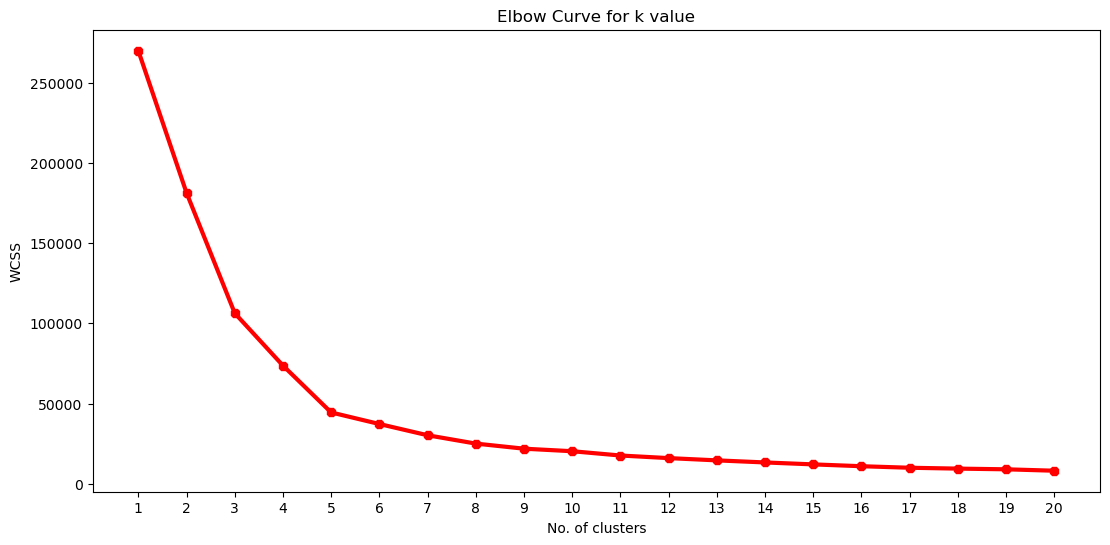

In [16]:
# plot the results for elbow method
plt.figure(figsize=(13,6))
plt.plot(range(1,21), errors)
plt.plot(range(1,21), errors, linewidth=3, marker='8',color='red')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,21,1))
plt.title('Elbow Curve for k value')
plt.show()

In [18]:
#Building the model
km=KMeans(n_clusters=5,random_state=42)
km.fit(data1)
y=km.predict(data1)
data1['Label'] = y
data1

,Annual Income (k$),Spending Score (1-100),Label
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2
...,...,...,...
195,120,79,4
196,126,28,1
197,126,74,4
198,137,18,1


Text(0.5, 1.0, 'Data Clusters')

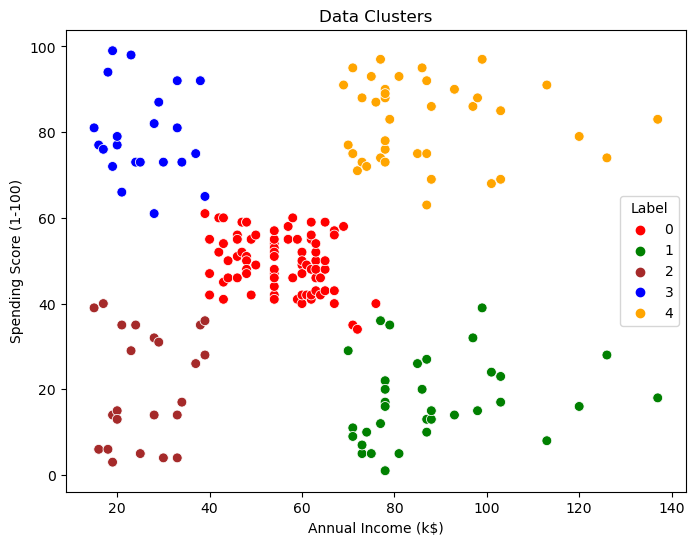

In [21]:
#Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data1, hue='Label', s=50, palette=['red', 'green', 'brown', 'blue', 'orange'])
plt.title("Data Clusters")

In [22]:
# cluster on 3 features
data2 = data[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']]
data2

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31
...,...,...,...
195,120,79,35
196,126,28,45
197,126,74,32
198,137,18,32


In [23]:
errors = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data2)
    errors.append(kmeans.inertia_)

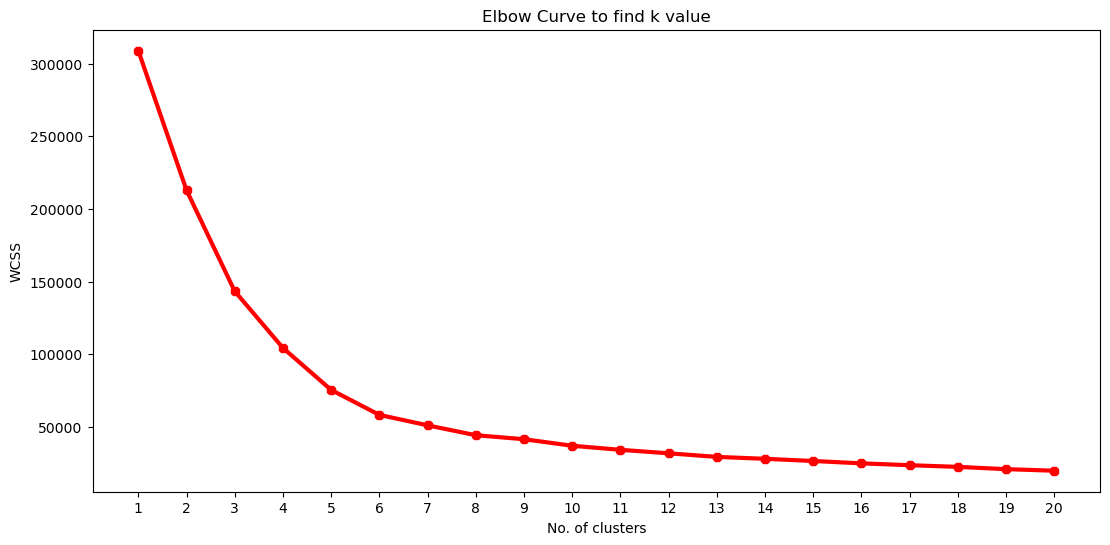

In [25]:
# plot the results for elbow method
plt.figure(figsize=(13,6))
plt.plot(range(1,21), errors)
plt.plot(range(1,21), errors, linewidth=3, color='red', marker='8')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,21,1))
plt.title("Elbow Curve to find k value")
plt.show()

In [26]:
#Building the KMeans
km = KMeans(n_clusters=6,random_state=42)
km.fit(data2)
y = km.predict(data2)
data2['Label'] = y
data2

,Annual Income (k$),Spending Score (1-100),Age,Label
0,15,39,19,0
1,15,81,21,3
2,16,6,20,0
3,16,77,23,3
4,17,40,31,0
...,...,...,...,...
195,120,79,35,1
196,126,28,45,5
197,126,74,32,1
198,137,18,32,5


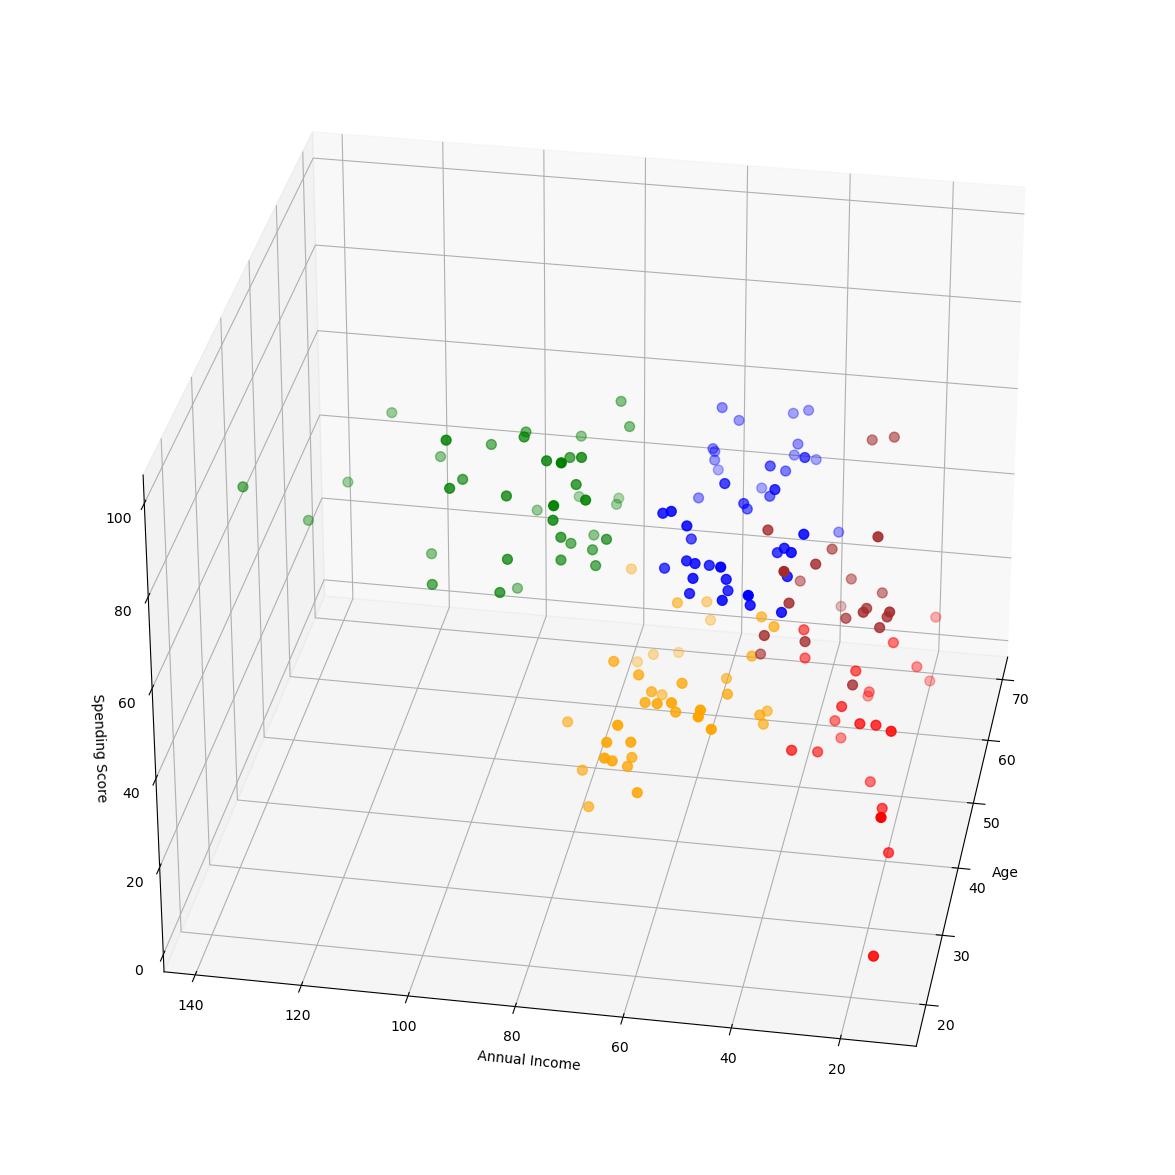

In [27]:
# 3d scatter plot
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data2['Age'][data2['Label']==0], data2['Annual Income (k$)'][data2['Label']==0], data2['Spending Score (1-100)'][data2['Label']==0], c='red', s=50)
ax.scatter(data2['Age'][data2['Label']==1], data2['Annual Income (k$)'][data2['Label']==1], data2['Spending Score (1-100)'][data2['Label']==1], c='green', s=50)
ax.scatter(data2['Age'][data2['Label']==2], data2['Annual Income (k$)'][data2['Label']==2], data2['Spending Score (1-100)'][data2['Label']==2], c='blue', s=50)
ax.scatter(data2['Age'][data2['Label']==3], data2['Annual Income (k$)'][data2['Label']==3], data2['Spending Score (1-100)'][data2['Label']==3], c='brown', s=50)
ax.scatter(data2['Age'][data2['Label']==4], data2['Annual Income (k$)'][data2['Label']==4], data2['Spending Score (1-100)'][data2['Label']==4], c='orange', s=50)
ax.view_init(30, 190)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()

In [28]:
#Importing libraries for PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
df = pca.fit_transform(data)
df = pd.DataFrame(df,columns=['pc1','pc2'])
df

,pc1,pc2
0,-109.383941,5.478454
1,-108.202857,-34.931765
2,-107.376292,37.840872
3,-106.007807,-30.562696
4,-104.980323,7.296747
...,...,...
195,111.652574,-27.964645
196,114.615358,24.017825
197,115.911505,-23.729967
198,120.939935,30.859889


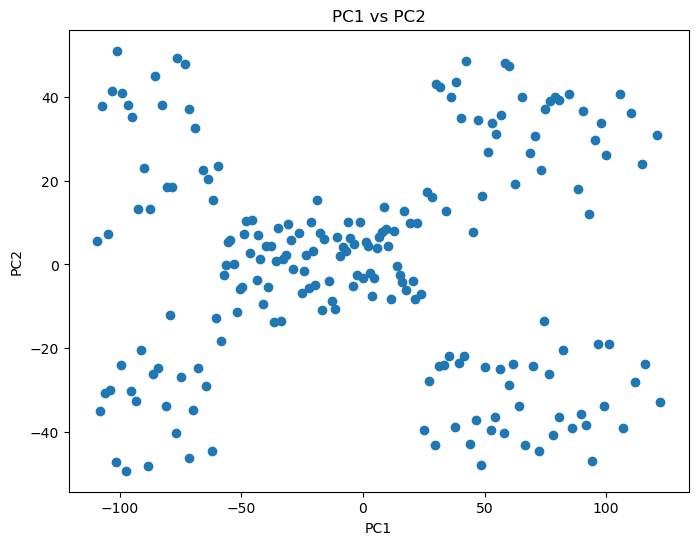

In [31]:
#Plot Between pc1 and pc2
plt.figure(figsize=(8,6))
plt.title("PC1 vs PC2")
plt.scatter(df['pc1'],df['pc2'])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [32]:
errors = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    errors.append(kmeans.inertia_)

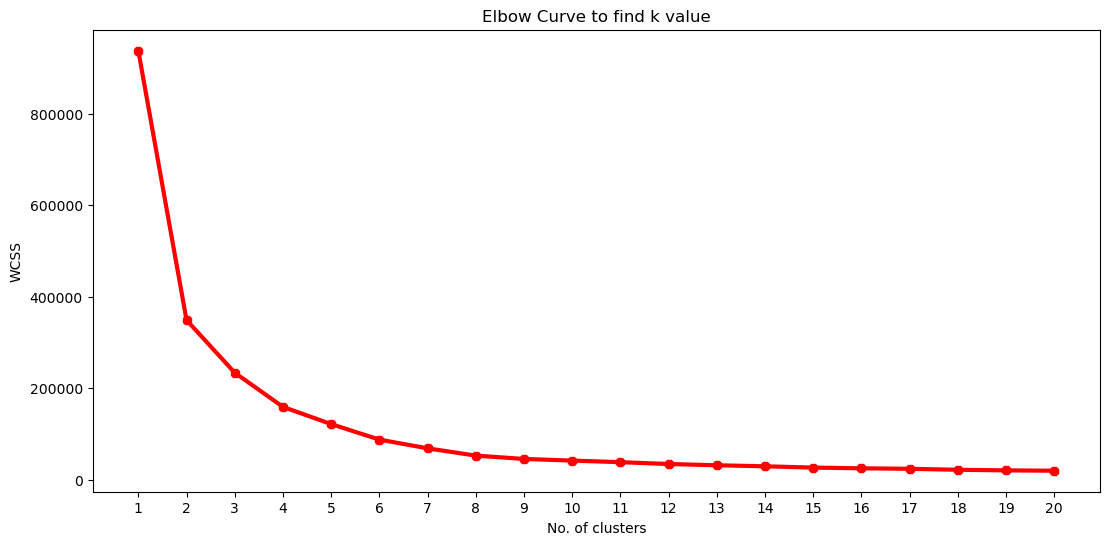

In [33]:
# plot the results for elbow method
plt.figure(figsize=(13,6))
plt.plot(range(1,21), errors)
plt.plot(range(1,21), errors, linewidth=3, color='red', marker='8')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,21,1))
plt.title("Elbow Curve to find k value")
plt.show()

In [34]:
#Building the KMeans
km = KMeans(n_clusters=6,random_state=42)
km.fit(df)
y = km.predict(df)
df['Label'] = y
df

,pc1,pc2,Label
0,-109.383941,5.478454,5
1,-108.202857,-34.931765,1
2,-107.376292,37.840872,5
3,-106.007807,-30.562696,1
4,-104.980323,7.296747,5
...,...,...,...
195,111.652574,-27.964645,2
196,114.615358,24.017825,4
197,115.911505,-23.729967,2
198,120.939935,30.859889,4


Text(0.5, 1.0, 'Data Clusters')

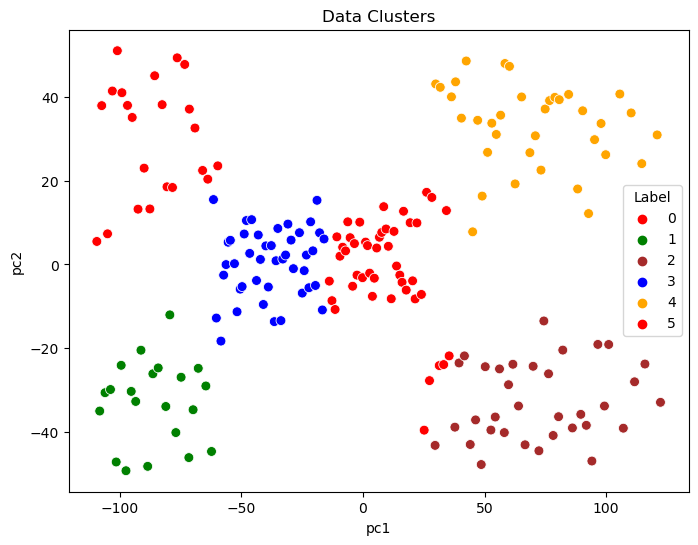

In [35]:
#Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='pc1', y='pc2', data=df, hue='Label', s=50, palette=['red', 'green', 'brown', 'blue', 'orange'])
plt.title("Data Clusters")

In [44]:
# Silhoutte Method to find the optimal number of clusters
from sklearn.metrics import silhouette_score
silscores = []
for i in range(2, 21):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(df)
    score = silhouette_score(data, kmeans.labels_)
    silscores.append(score)
print(silscores)

[0.4793049017423563, 0.37293171294061667, 0.41954493354909417, 0.4160191741901677, 0.41124545017853514, 0.4066816122845884, 0.40186169608822775, 0.35760466839443383, 0.33374253999870496, 0.3162480276222817, 0.29704830690768635, 0.2825042446226023, 0.2669807884162739, 0.26078446118376564, 0.24917132790698218, 0.25337517966318385, 0.2259816239776425, 0.25462486222723624, 0.23437878311545873]


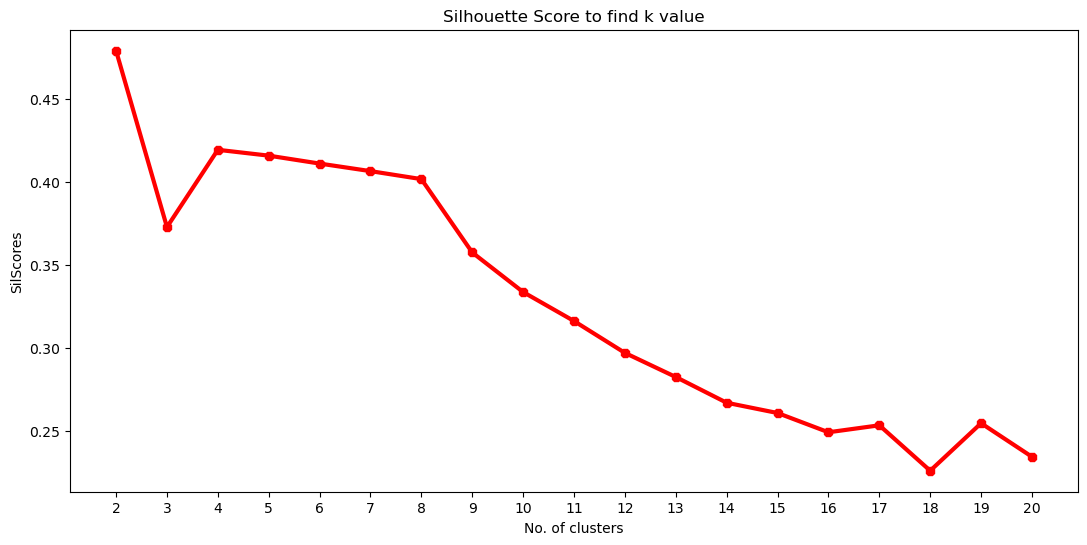

In [46]:
plt.figure(figsize=(13,6))
plt.plot(range(2,21), silscores)
plt.plot(range(2,21), silscores, linewidth=3, color='red', marker='8')
plt.xlabel('No. of clusters')
plt.ylabel('SilScores')
plt.xticks(np.arange(2,21,1))
plt.title("Silhouette Score to find k value")
plt.show()

In [47]:
# k = 2
kmeans = KMeans(n_clusters = 2)
y_pred = kmeans.fit_predict(data)
data3 = data.copy()
data3['Label'] = y_pred
data3.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,1
3,4,0,23,16,77,1
4,5,0,31,17,40,1


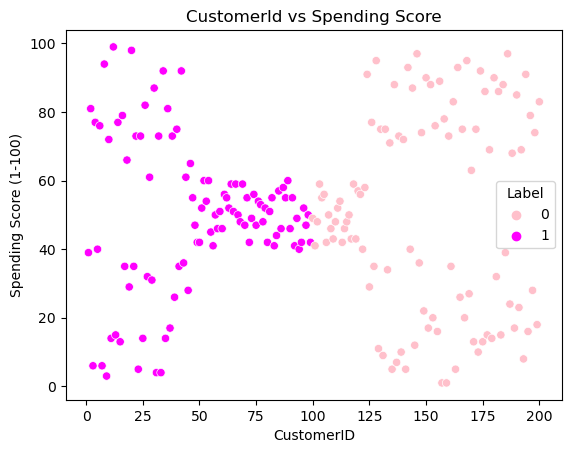

In [48]:
#Plotting CustomerId and Spending Score
plt.title("CustomerId vs Spending Score")
sns.scatterplot(x=data3['CustomerID'], 
                y=data3['Spending Score (1-100)'], 
                data=data3, 
                hue='Label', 
                palette=['pink', 'magenta'])
plt.show()